<a href="https://colab.research.google.com/github/ofelipevilela/Metodos-Discretos/blob/main/Atividade_8_Sistemas_de_EDOs_de_primeira_ordem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy matplotlib


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Definindo as funções f1 e f2 do sistema de EDOs
def f1(x, y, z):
    return (-y + z) * np.exp(1 - x) + 0.5 * y

def f2(x, y, z):
    return y - z**2


In [ ]:
# Implementando o Método de Runge-Kutta de Segunda Ordem (Euler Modificado)
def runge_kutta_2nd_order(f1, f2, y0, z0, x0, h, n):
    y = np.zeros(n+1)
    z = np.zeros(n+1)
    x = np.zeros(n+1)

    y[0] = y0
    z[0] = z0
    x[0] = x0

    for i in range(n):
        K1_y = f1(x[i], y[i], z[i])
        K1_z = f2(x[i], y[i], z[i])

        K2_y = f1(x[i] + h, y[i] + h * K1_y, z[i] + h * K1_z)
        K2_z = f2(x[i] + h, y[i] + h * K1_y, z[i] + h * K1_z)

        y[i+1] = y[i] + (h / 2) * (K1_y + K2_y)
        z[i+1] = z[i] + (h / 2) * (K1_z + K2_z)
        x[i+1] = x[i] + h

    return x, y, z


In [ ]:
# Funções que representam os cálculos manuais com h = 0.25
def manual_solution():
    # Definindo os valores manuais calculados previamente para h = 0.25
    x_manual = np.array([0, 0.25, 0.5])
    y_manual = np.array([3, 2.18745, 1.90376])
    z_manual = np.array([0.2, 0.6436, 0.9231])
    return x_manual, y_manual, z_manual


In [ ]:

# Parâmetros iniciais
y0 = 3
z0 = 0.2
x0 = 0
h = 0.1
n = 30  # Número de passos (de x=0 a x=3 com h=0.1)

# Resolvendo o sistema de EDOs com h = 0.1
x_rk, y_rk, z_rk = runge_kutta_2nd_order(f1, f2, y0, z0, x0, h, n)

# Resolvendo o sistema de EDOs com os valores manuais (h = 0.25)
x_manual, y_manual, z_manual = manual_solution()



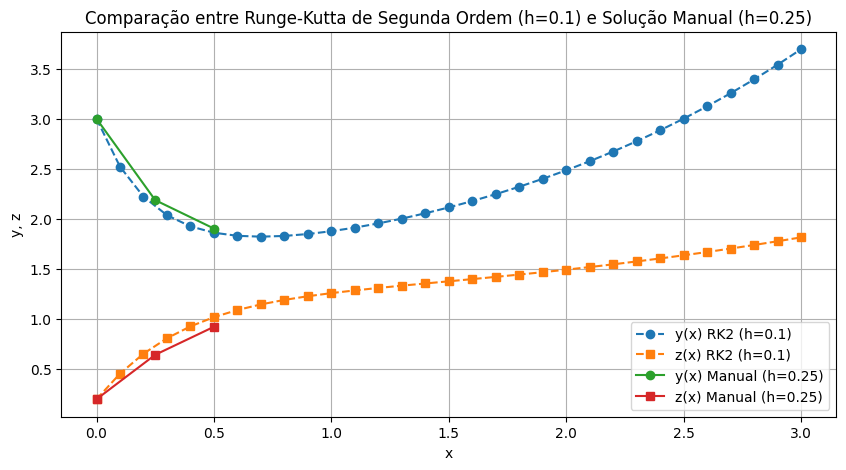

In [ ]:
# Plotando os resultados
plt.figure(figsize=(10, 5))

# Resultados com Runge-Kutta de Segunda Ordem (Euler Modificado)
plt.plot(x_rk, y_rk, label='y(x) RK2 (h=0.1)', marker='o', linestyle='--')
plt.plot(x_rk, z_rk, label='z(x) RK2 (h=0.1)', marker='s', linestyle='--')

# Resultados manuais com h = 0.25
plt.plot(x_manual, y_manual, label='y(x) Manual (h=0.25)', marker='o', linestyle='-')
plt.plot(x_manual, z_manual, label='z(x) Manual (h=0.25)', marker='s', linestyle='-')

plt.xlabel('x')
plt.ylabel('y, z')
plt.title('Comparação entre Runge-Kutta de Segunda Ordem (h=0.1) e Solução Manual (h=0.25)')
plt.legend()
plt.grid(True)
plt.show()
